# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [49]:
#Your code here
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

from google.colab import drive
import os
import matplotlib.pyplot as plt


**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [50]:
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
# Load the dataset
data = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/dataset',  # Replace with the path to your dataset
    image_size=(256, 256),
    batch_size=32,
    label_mode='int'
)



Found 1687 files belonging to 4 classes.




*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [52]:
data_iterator=data.as_numpy_iterator()

In [53]:
batch=data_iterator.next()

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

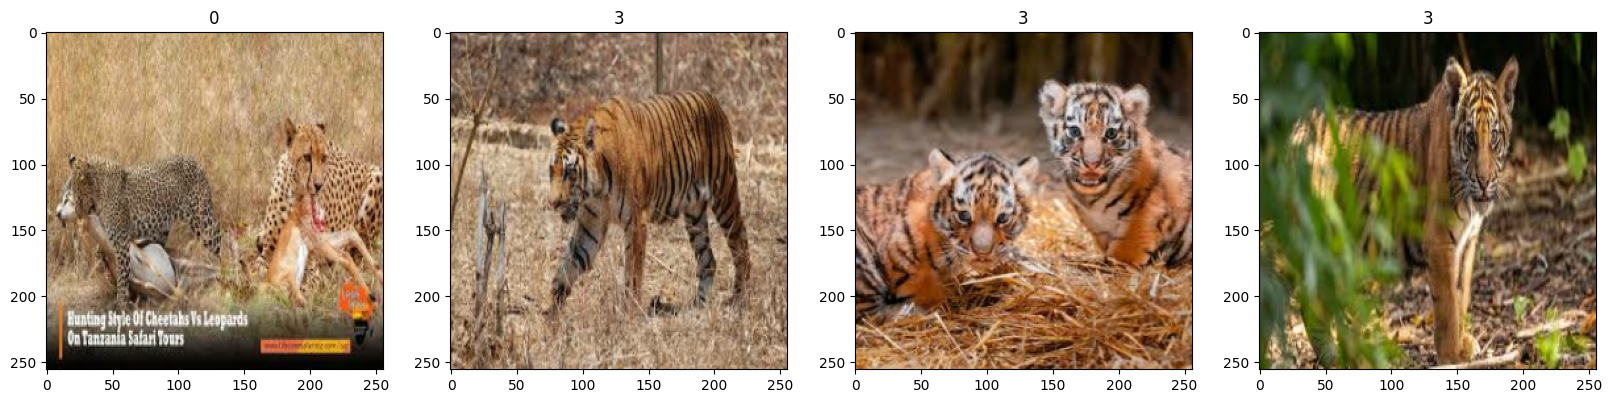

In [54]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [55]:
data = data.map(lambda x, y: (x / 255.0, y))


**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [56]:
#Your code here
train_size = int(0.8 * len(data))
val_size = int(0.1 * len(data))
test_size = len(data) - train_size - val_size

train_data = data.take(train_size)
val_data = data.skip(train_size).take(val_size)
test_data = data.skip(train_size + val_size)


**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [57]:
model = models.Sequential([
    layers.InputLayer(input_shape=(256, 256, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 classes for elephants, tigers, cheetahs, and crocodiles
])


**Q.6** Compile your model

In [58]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [59]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15
)


Epoch 1/15
42/42 [==============================] - 177s 4s/step - loss: 1.4713 - accuracy: 0.3408 - val_loss: 1.2809 - val_accuracy: 0.3938
Epoch 2/15
42/42 [==============================] - 27s 607ms/step - loss: 1.1170 - accuracy: 0.5201 - val_loss: 1.0568 - val_accuracy: 0.5437
Epoch 3/15
42/42 [==============================] - 25s 562ms/step - loss: 0.8823 - accuracy: 0.6369 - val_loss: 0.7551 - val_accuracy: 0.7563
Epoch 4/15
42/42 [==============================] - 25s 558ms/step - loss: 0.6255 - accuracy: 0.7664 - val_loss: 0.7168 - val_accuracy: 0.7063
Epoch 5/15
42/42 [==============================] - 33s 756ms/step - loss: 0.4428 - accuracy: 0.8244 - val_loss: 0.7148 - val_accuracy: 0.7563
Epoch 6/15
42/42 [==============================] - 25s 557ms/step - loss: 0.3014 - accuracy: 0.8973 - val_loss: 0.5684 - val_accuracy: 0.8062
Epoch 7/15
42/42 [==============================] - 33s 757ms/step - loss: 0.1919 - accuracy: 0.9353 - val_loss: 0.4667 - val_accuracy: 0.8500
E

**Q.8** Test your code with test set

In [60]:
loss,accuracy=model.evaluate(test_data)

6/6 [==============================] - 14s 142ms/step - loss: 0.7561 - accuracy: 0.8525


In [61]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

Congratulations, CNN assignment complete!! Your accuracy is 0.8524590134620667


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increasing the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than that everything should be fine, happy learning!!**